In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 깨짐 방지를 위한 Font 지정
import os

data = pd.read_csv('동별통합데이터.csv')
data

,Unnamed: 0,Gu,Dong,Hospital_Counts,Sales_Counts,Consignment_Counts,Transit_Counts,Production_Counts,Import_Counts,Population,Pet_Owners,Total_Registrations
0,0,영등포구,영등포동,5,5,5,0,1,0,53949,1709,2207
1,1,영등포구,여의동,4,3,3,0,0,0,33713,1659,2064
2,2,영등포구,양평동,3,1,1,2,0,0,41180,1672,2099
3,3,영등포구,신길동,14,3,8,1,2,0,99799,4212,5303
4,4,영등포구,문래동,3,2,2,1,0,0,32342,1222,1636
...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,용산구,이태원동,3,1,10,0,0,0,18022,1687,2487
141,141,용산구,이촌동,3,0,4,0,0,0,33445,1855,2432
142,142,용산구,원효로동,4,0,4,1,0,0,13763,1559,2287
143,143,용산구,용산동,3,0,3,0,0,0,10271,985,1301


In [2]:
data=data.drop(['Unnamed: 0',	'Gu',	'Dong'],axis=1)

In [3]:
# 열들 간의 상관 관계 계산
correlation = data.corr()

# 소수점 둘째자리까지 반올림

correlation

,Hospital_Counts,Sales_Counts,Consignment_Counts,Transit_Counts,Production_Counts,Import_Counts,Population,Pet_Owners,Total_Registrations
Hospital_Counts,1.000000,0.581367,0.774490,0.634743,0.123025,0.079955,0.747738,0.808877,0.804647
Sales_Counts,0.581367,1.000000,0.705499,0.465372,0.180450,0.297126,0.446194,0.463478,0.453116
Consignment_Counts,0.774490,0.705499,1.000000,0.642121,0.068255,0.160868,0.655493,0.672881,0.688781
Transit_Counts,0.634743,0.465372,0.642121,1.000000,0.194937,-0.017100,0.803840,0.768660,0.773551
Production_Counts,0.123025,0.180450,0.068255,0.194937,1.000000,0.125925,0.138339,0.147008,0.155359
Import_Counts,0.079955,0.297126,0.160868,-0.017100,0.125925,1.000000,-0.041835,-0.013956,-0.014803
Population,0.747738,0.446194,0.655493,0.803840,0.138339,-0.041835,1.000000,0.907495,0.906300
Pet_Owners,0.808877,0.463478,0.672881,0.768660,0.147008,-0.013956,0.907495,1.000000,0.995426
Total_Registrations,0.804647,0.453116,0.688781,0.773551,0.155359,-0.014803,0.906300,0.995426,1.000000


In [4]:
# 상관관계 행렬에서 0.7 이상인 값의 행과 열 이름 추출
# 0.7 이상일 때, 강한 양적 선형관계를 가짐
correlation_pair = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if correlation.iloc[i, j] >= 0.9:
            pair = (correlation.columns[i], correlation.columns[j], correlation.iloc[i, j])
            correlation_pair.append(pair)

# 중복된 쌍 제거
unique_pair = []
for pair in correlation_pair:
    if (pair[1], pair[0], pair[2]) not in unique_pair:  # 반대 방향의 쌍이 중복되는 경우를 제거
        unique_pair.append(pair)

print("상관관계가 0.9 이상인 값")
for pair in correlation_pair:
    print(pair)

상관관계가 0.9 이상인 값
('Population', 'Pet_Owners', 0.9074949974644287)
('Population', 'Total_Registrations', 0.9062996896378848)
('Pet_Owners', 'Total_Registrations', 0.995426420835974)


In [5]:
# 필요한 행만 추출
correlation_강 = pd.DataFrame(unique_pair)
correlation_강 = correlation_강.iloc[:3]
correlation_강.rename(columns ={0:'변수1', 1:'변수2',2:'상관계수'},inplace=True)
correlation_강

,변수1,변수2,상관계수
0,Population,Pet_Owners,0.907495
1,Population,Total_Registrations,0.906300
2,Pet_Owners,Total_Registrations,0.995426


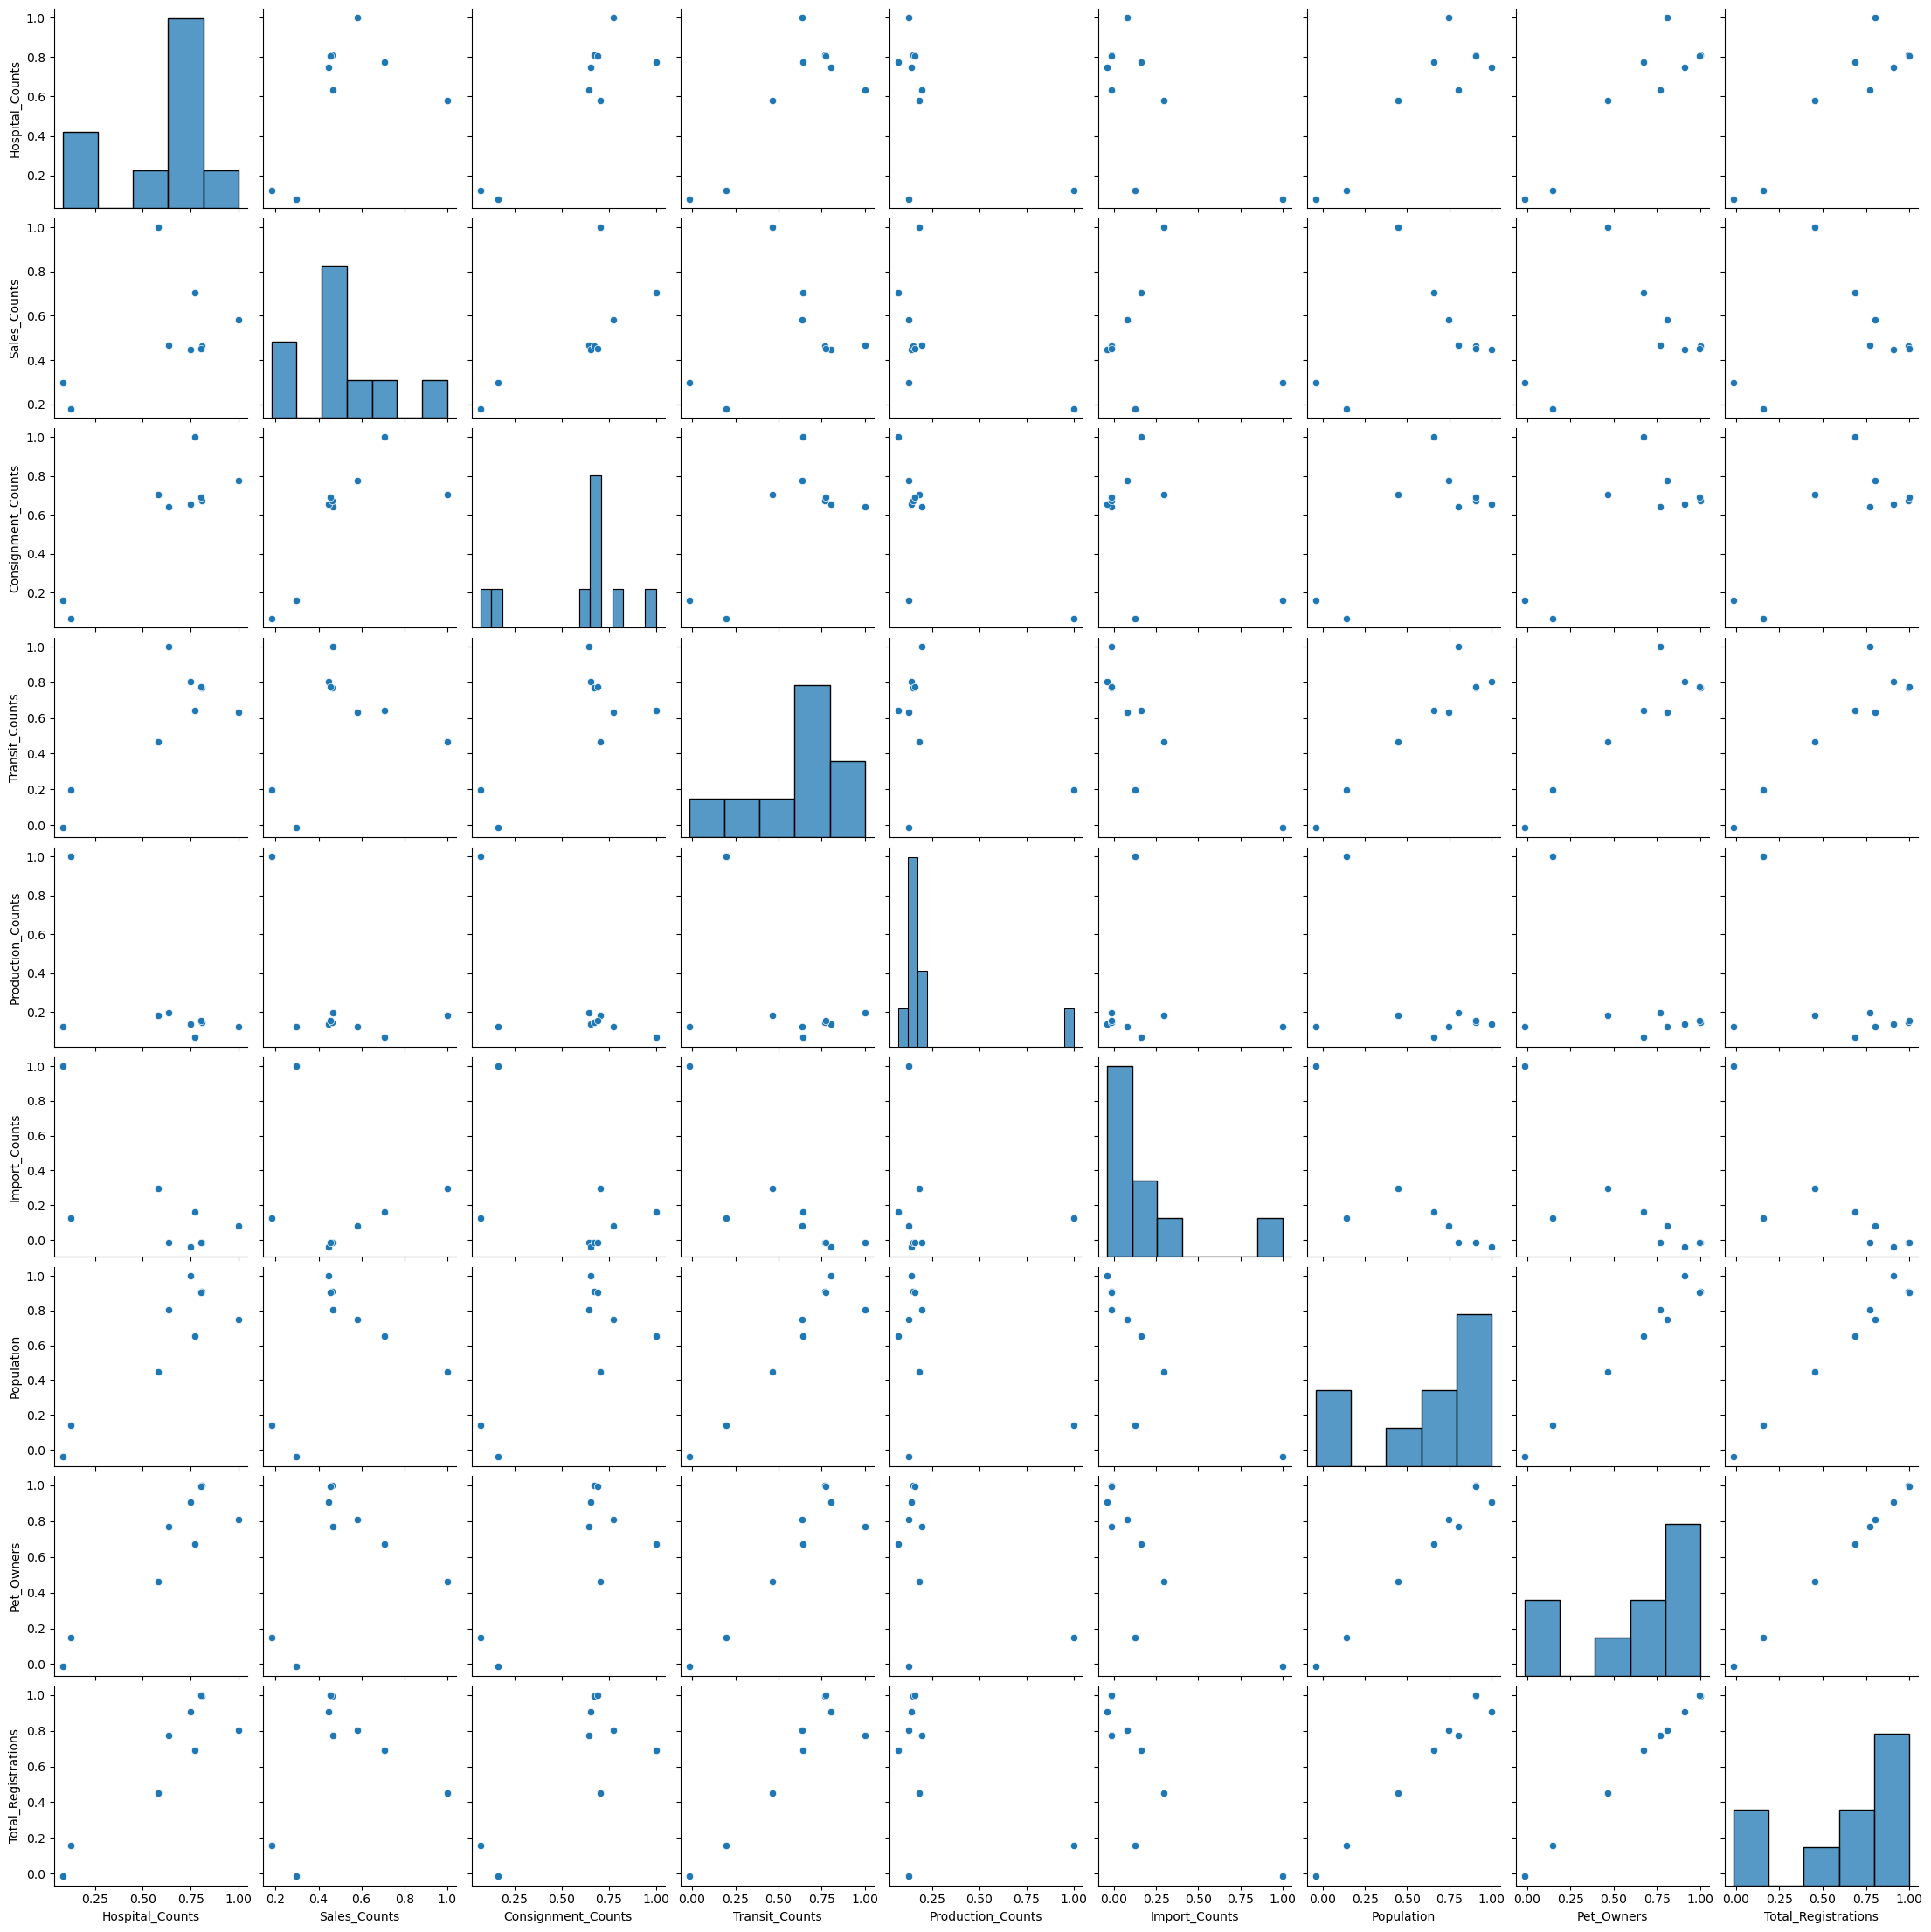

In [6]:
sns.pairplot(correlation, diag_kind = 'hist')
plt.show()

In [7]:
# 한글 깨짐 현상 벙지

if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

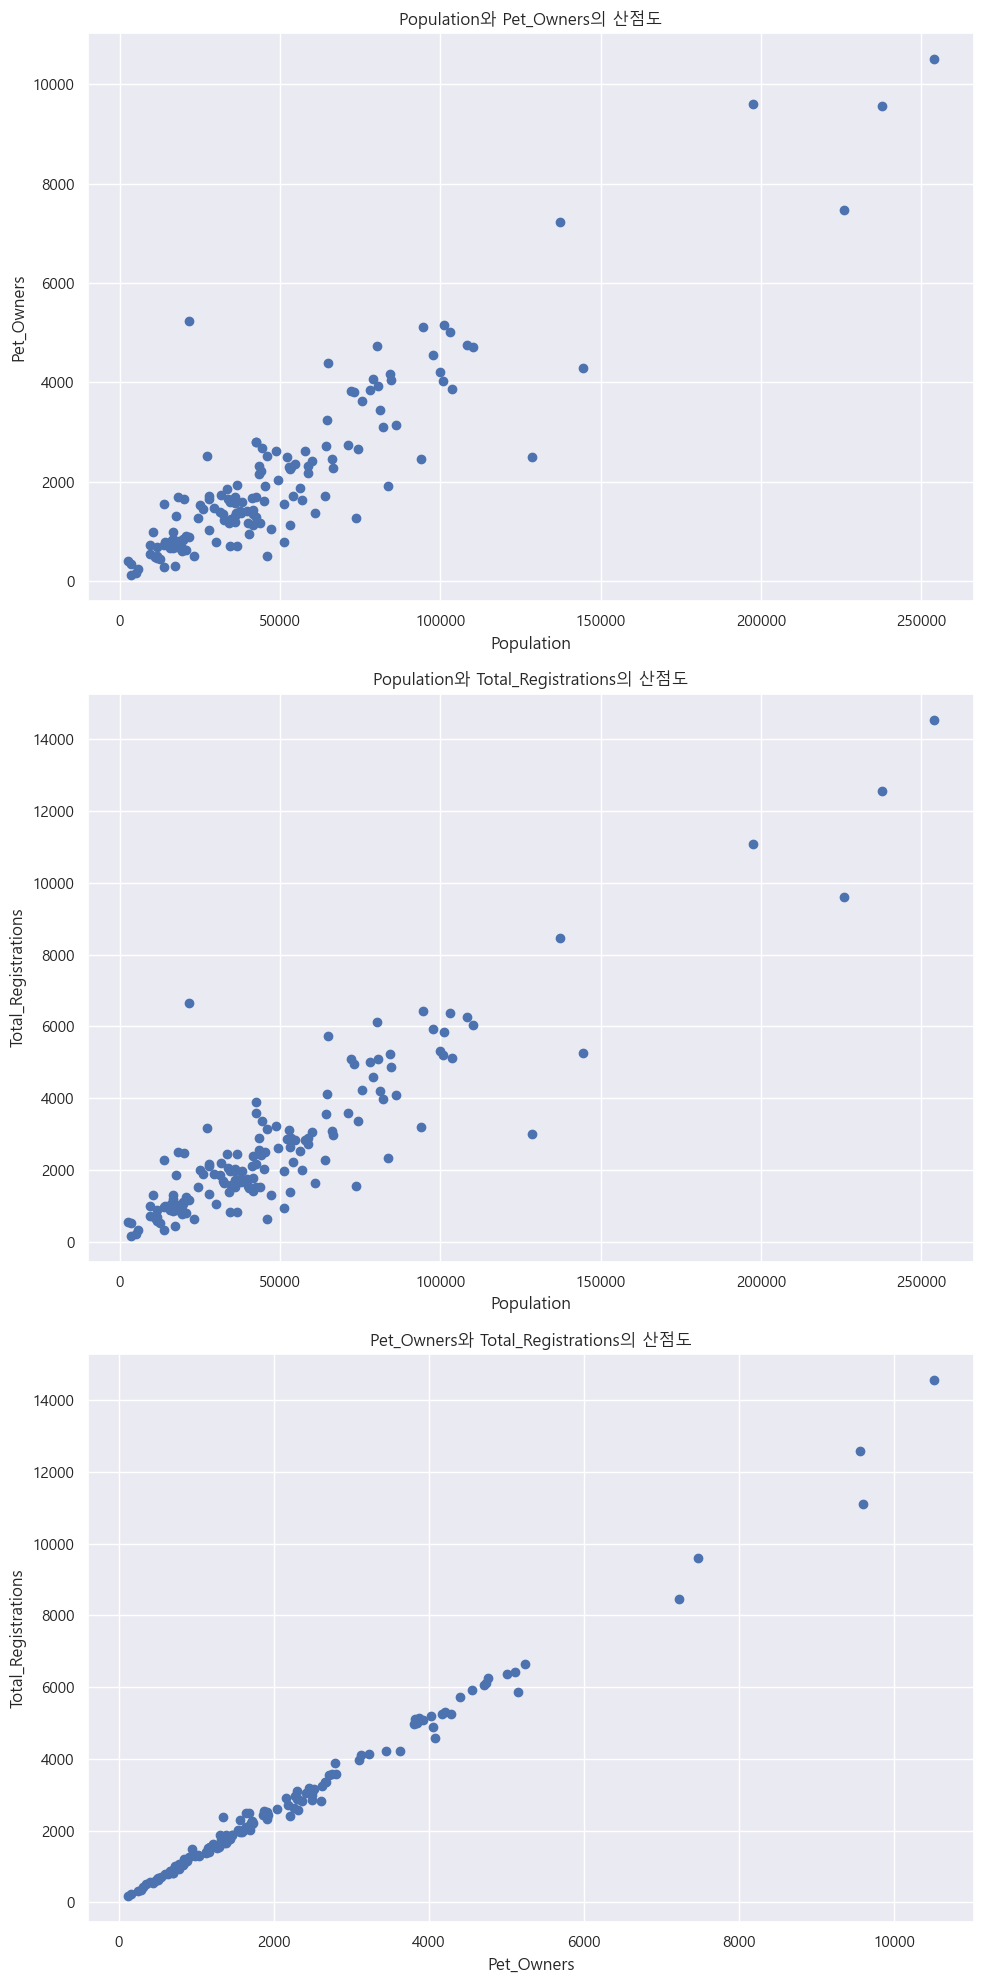

In [9]:

# 산점도 그리기
fig, ax = plt.subplots(nrows=3, figsize=(10, 20))

# 각각의 산점도를 서브플롯에 그리기
for i in range(3):
    x_label = correlation_강['변수1'][i]
    y_label = correlation_강['변수2'][i]
    ax[i].scatter(x=data[x_label], y=data[y_label])
    ax[i].set_xlabel(x_label)
    ax[i].set_ylabel(y_label)
    ax[i].set_title(f'{x_label}와 {y_label}의 산점도')
    
plt.tight_layout()
plt.show()

In [10]:
# 표 그리기
import plotly.express as px
fig = px.imshow(correlation, text_auto=True)
fig.show()

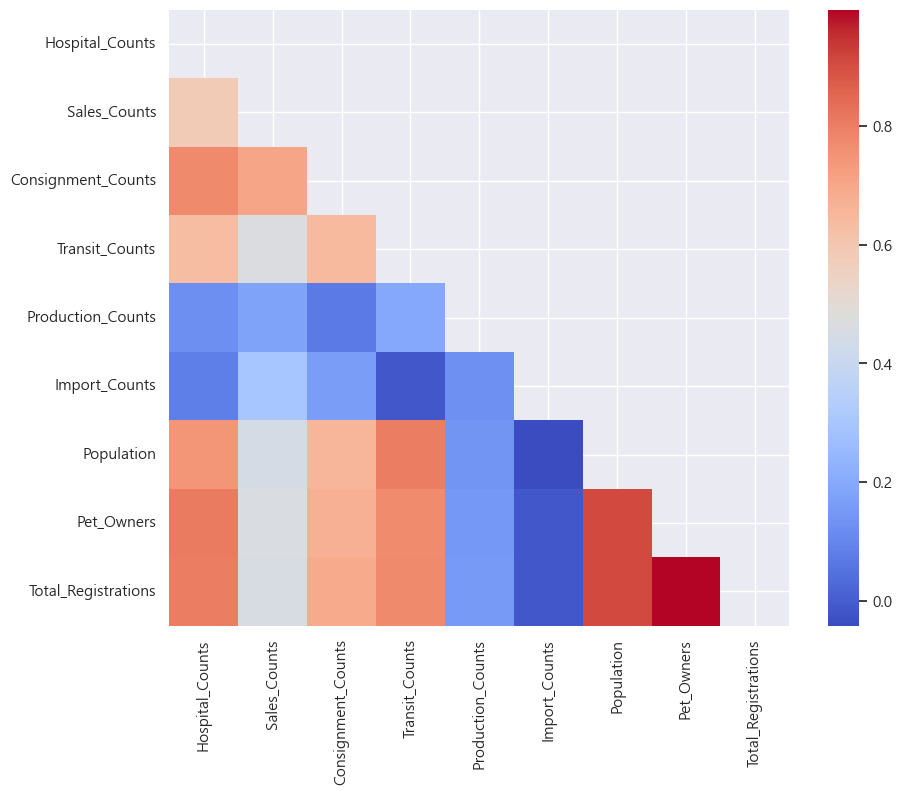

In [11]:
# heatmap 이용

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='coolwarm', mask=np.triu(np.ones_like(correlation)))

plt.show()

# np.triu 함수를 사용하여 matrix 삼각행렬로 만들기 
# mask = np.triu(np.ones_like(correlation))
